In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

In [3]:
file_path = r"C:\Users\kavki\Downloads\archive\car_data.csv"  # Adjust if the filename differs
data = pd.read_csv(file_path)


In [4]:
data = data.dropna(subset=['cylinders', 'displacement'])  # Drop rows with missing values

In [6]:
categorical_features = ['class', 'drive', 'fuel_type', 'make', 'transmission']
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Updated to avoid warning
encoded_features = encoder.fit_transform(data[categorical_features])

In [7]:
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))
data = pd.concat([data.reset_index(drop=True), encoded_df], axis=1)
data = data.drop(categorical_features + ['model'], axis=1)  

In [8]:
X = data.drop('combination_mpg', axis=1)  # Features (everything except 'combination_mpg')
y = data['combination_mpg']  # Target (the value we want to predict)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.14055955034177736
R^2 Score: 0.994760023664302


In [16]:
import numpy as np

In [17]:
sample_input = X_test.iloc[0:1]  # Select the first row as a DataFrame

In [18]:
predicted_mpg = model.predict(sample_input)

In [19]:
print(f"Predicted MPG for sample input: {predicted_mpg[0]}")

Predicted MPG for sample input: 19.070653061438215


In [20]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print(f"Random Forest MSE: {mean_squared_error(y_test, rf_pred)}")

Random Forest MSE: 0.4341672727272726


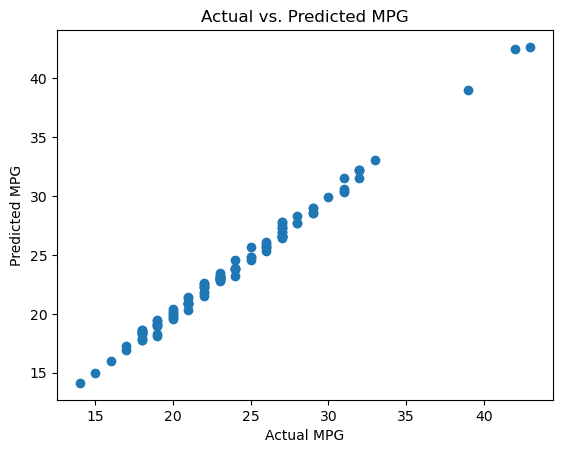

In [21]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs. Predicted MPG")
plt.show()
